In [1]:
import sys
sys.path.append('../')
import PhlyGreen as pg
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from mpl_toolkits.mplot3d import Axes3D

In [2]:
powertrain = pg.Systems.Powertrain.Powertrain(None)
structures = pg.Systems.Structures.Structures(None)
aerodynamics = pg.Systems.Aerodynamics.Aerodynamics(None)
performance = pg.Performance.Performance(None)
mission = pg.Mission.Mission(None)
weight = pg.Weight.Weight(None)
constraint = pg.Constraint.Constraint(None)
welltowake = pg.WellToWake.WellToWake(None)
climateimpact = pg.ClimateImpact.ClimateImpact(None)

myaircraft = pg.Aircraft(powertrain, structures, aerodynamics, performance, mission, weight, constraint, welltowake, climateimpact)

powertrain.aircraft = myaircraft
structures.aircraft = myaircraft
aerodynamics.aircraft = myaircraft
mission.aircraft = myaircraft
performance.aircraft = myaircraft
weight.aircraft = myaircraft
constraint.aircraft = myaircraft
welltowake.aircraft = myaircraft
climateimpact.aircraft = myaircraft

ConstraintsInput = {'speed': np.array([0.4, 140, 170, 210, 0.5, 0.35, 104.]) ,
                    'speedtype': ['Mach','KCAS','KCAS','KCAS','Mach','Mach','KCAS']   ,
                    'beta': np.array([0.95,0.985,0.97, 0.9, 0.8, 0.9, None])   ,
                    'altitude': np.array([8000., 100., 6000., 5000, 9500., 6000, 500.]),
                    'load factor': np.array([1., None, 1., 1.1, 1., 1., None]),
                    'DISA': 0, 
                    'kTO': 1.2,
                    'sTO': 950,
                    'OEI Climb Gradient': 0.021,
                    'Rate of Climb': 5,  #5m/s ~= 1000 ft/min, 7.6 ~= 1500 ft/min
                    'ht': 0.5,
                    'M1': 0.3,
                    'M2': 0.4,
                    'DTAcceleration': 180}

MissionInput = {'Range Mission': 750,  #nautical miles
                'Range Diversion': 220,  #nautical miles
                'Beta start': 0.985,
                'Payload Weight': 4560,  #Kg
                'Crew Weight': 500}  #Kg

MissionStages = {'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.12, 'Speed': 77, 'StartAltitude': 100, 'EndAltitude': 1500}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Climb2': {'type': 'ConstantRateClimb', 'input': {'CB': 0.06, 'Speed': 110, 'StartAltitude': 1500, 'EndAltitude': 4500}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Climb3': {'type': 'ConstantRateClimb', 'input': {'CB': 0.05, 'Speed': 110, 'StartAltitude': 4500, 'EndAltitude': 7000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.45, 'Altitude': 7000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 7000, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

DiversionStages = {'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.06, 'Speed': 110, 'StartAltitude': 200, 'EndAltitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.2, 'Altitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 3100, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

EnergyInput = {'Ef': 43.5*10**6,
                   'Eta Gas Turbine Model': 'PW127',
                   #'Eta Gas Turbine': 0.22,
                   'Eta Gearbox': 0.96,
                   'Eta Propulsive Model': 'constant',
                   'Eta Propulsive': 0.75,
                   'Specific Power Powertrain': [3900,0]  # W/Kg
                   }

AerodynamicsInput = {'NumericalPolar': {'type': 'ATR42'}}

ClimateImpactInput = {'H': 100, 'N':497*50, 'Y':30, 'EINOx_model':'Filippone'}

myaircraft.ConstraintsInput = ConstraintsInput
myaircraft.AerodynamicsInput = AerodynamicsInput
myaircraft.MissionInput = MissionInput
myaircraft.MissionStages = MissionStages
myaircraft.DiversionStages = DiversionStages
myaircraft.EnergyInput = EnergyInput
myaircraft.ClimateImpactInput = ClimateImpactInput

myaircraft.Configuration = 'Traditional'

In [3]:
myaircraft.constraint.SetInput()
myaircraft.aerodynamics.SetInput()
myaircraft.powertrain.SetInput()
myaircraft.weight.SetInput()
myaircraft.climateimpact.SetInput()
myaircraft.mission.InitializeProfile()
myaircraft.mission.SetInput()

myaircraft.constraint.FindDesignPoint()
print('----------------------------------------')
print('Design W/S: ',myaircraft.DesignWTOoS)
print('Design P/W: ',myaircraft.DesignPW)
print('----------------------------------------')

----------------------------------------
Design W/S:  3328.8528528528527
Design P/W:  168.51352203046332
----------------------------------------


In [4]:
myaircraft.weight.WeightEstimation()
myaircraft.WingSurface = myaircraft.weight.WTO / myaircraft.DesignWTOoS * myaircraft.performance.g_acc 
print('----------------------------------------')
print('Fuel mass (trip + altn) [Kg]: ', myaircraft.weight.Wf)
print('Block Fuel mass [Kg]:         ', myaircraft.weight.Wf + myaircraft.weight.final_reserve)
print('Structure [Kg]:               ', myaircraft.weight.WStructure)
print('Powertrain mass [Kg]:         ',myaircraft.weight.WPT)
print('Empty Weight [Kg]:            ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew)
print('Zero Fuel Weight [Kg]:        ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.WPayload)
print('----------------------------------------')
print('Takeoff Weight [Kg]:          ', myaircraft.weight.WTO)
if myaircraft.WellToTankInput is not None:
    print('Source Energy: ', myaircraft.welltowake.SourceEnergy/1.e6,' MJ')
    print('Psi: ', myaircraft.welltowake.Psi)
print('Wing Surface [m^2]:           ', myaircraft.WingSurface)
print('TakeOff shaft peak power [kW]:      ', myaircraft.mission.TO_PP/1000.)
print('Climb/cruise shaft peak power [kW]: ', myaircraft.mission.Max_PEng/1000.)
print('Sizing phase for thermal powertrain: ', 'Climb/Cruise peak power' if myaircraft.mission.Max_PEng > myaircraft.mission.TO_PP else 'Takeoff peak power'  )
print('----------------------------------------')

----------------------------------------
Fuel mass (trip + altn) [Kg]:  2133.2710778275346
Block Fuel mass [Kg]:          2263.2710778275346
Structure [Kg]:                10377.131056455126
Powertrain mass [Kg]:          1024.617262840593
Empty Weight [Kg]:             11901.748319295719
Zero Fuel Weight [Kg]:         16461.74831929572
----------------------------------------
Takeoff Weight [Kg]:           18724.985998968787
Wing Surface [m^2]:            55.18180609649305
TakeOff shaft peak power [kW]:       3996.007325078313
Climb/cruise shaft peak power [kW]:  3325.9688771073147
Sizing phase for thermal powertrain:  Takeoff peak power
----------------------------------------


In [5]:
# from scipy.optimize import brenth 
# maxFuelCapacity = 4000 #Kg (4000 + final reserve)
# MTOW = myaircraft.weight.WTO #Kg
# OEW = myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.final_reserve #Kg 
# MZFW =OEW + myaircraft.weight.WPayload #Kg 
# WPayload = 4560 #Kg
# wfuel = myaircraft.weight.Wf
# designRange = 750 #nm

# drng = 10 #nm

# def funcNL(Wf, WPayload):
#      return Wf - myaircraft.mission.EvaluateMission(OEW + WPayload+ Wf)/myaircraft.weight.ef

# #1 non-limited range
# missionRangeNL = np.linspace(150,designRange,num=50, endpoint=True) 
# wfuelNL = []
# for rng in missionRangeNL:
#     newmission = pg.Mission.Mission(myaircraft)
#     myaircraft.mission = newmission
#     myaircraft.MissionInput['Range Mission'] = rng
#     myaircraft.mission.InitializeProfile()
#     myaircraft.mission.SetInput()
#     wfuelNL.append(brenth(funcNL, 0, maxFuelCapacity, args=(WPayload), xtol=0.01) )

In [6]:
quote = np.linspace(4500, 7500, 20)
mach = np.linspace(0.3, 0.55, 20)

quote_grid, mach_grid = np.meshgrid(quote, mach)

ATR = np.zeros_like(mach_grid)
fuel_mass = np.zeros_like(mach_grid)
CO2 = np.zeros_like(mach_grid)
H2O = np.zeros_like(mach_grid)
SO4 = np.zeros_like(mach_grid)
soot = np.zeros_like(mach_grid)
NOx = np.zeros_like(mach_grid)

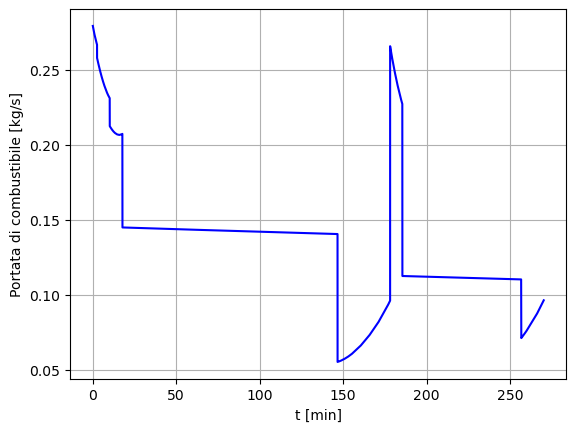

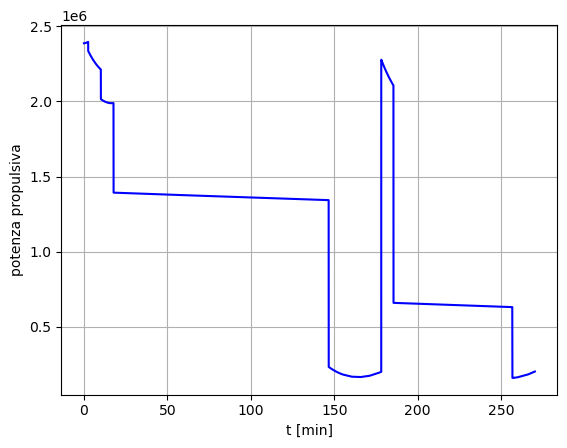

risultato dell integrale della portata nel tempo: 2133.515369375165 kg
questo valore differisce dall originale del 0.011451500475933997%


In [7]:
times = np.array([])
beta = np.array([])
for array in mission.integral_solution:
    times = np.concatenate([times, array.t])
    beta = np.concatenate([beta, array.y[1]])
    
dEdt = np.zeros(len(times))
PP = np.zeros(len(times))
for t in range(len(times)):
    PP[t] = (myaircraft.weight.WTO) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS')
    PRatio = myaircraft.powertrain.Traditional(myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.profile.Velocity(times[t]),PP[t])
    dEdt[t] = PP[t] * PRatio[0]
portata = dEdt/myaircraft.weight.ef

plt.figure(1)
plt.plot(times/60,portata, 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Portata di combustibile [kg/s]')
plt.show()

plt.figure(2)
plt.plot(times/60,PP, 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('potenza propulsiva')
plt.show()

# l'integrale della portata nel tempo deve coincidere con myaircraft.weight.Wf
from scipy.integrate import cumtrapz
massa_di_fuel = cumtrapz(portata, times, initial=0.0)
# l'elemento n-esimo del vettore massa_di_fuel è l'integrale definito della portata tra t = 0 e t = times[n]
print(f'risultato dell integrale della portata nel tempo: {massa_di_fuel[-1]} kg')
err = 100*abs(myaircraft.weight.Wf - massa_di_fuel[-1])/myaircraft.weight.Wf
print(f'questo valore differisce dall originale del {err}%')

In [8]:
from scipy.optimize import brenth 
maxFuelCapacity = 4000 #Kg (4000 + final reserve)
OEW = myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.final_reserve # [Kg]
WPayload = myaircraft.MissionInput['Payload Weight']  # [kg]

def funcNL(Wf, WPayload):
    return Wf - myaircraft.mission.EvaluateMission(OEW + WPayload+ Wf)/myaircraft.weight.ef

In [9]:
# # verifica che questo metodo calcoli correttamente il consumo di combustibile

# print(myaircraft.weight.Wf)  # 2133.2710778275346        
# newmission = pg.Mission.Mission(myaircraft)
# myaircraft.mission = newmission
# myaircraft.MissionStages['Climb3']['input']['EndAltitude'] = 7000
# myaircraft.MissionStages['Cruise']['input']['Altitude'] = 7000
# myaircraft.MissionStages['Descent1']['input']['StartAltitude'] = 7000
# myaircraft.MissionStages['Cruise']['input']['Mach'] = 0.45
# myaircraft.mission.InitializeProfile()
# myaircraft.mission.SetInput()

# wfuel = brenth(funcNL, 0, maxFuelCapacity, args=(WPayload), xtol=0.01)

# print(wfuel)  # 2133.2691827264202

Nuovo valore di Wf:  2078.723044203417
[0.2787819298334076, 0.27878192983339994, 0.2787819298334076, 0.2787819298334076, 0.2787819267864092, 0.2787819298334076, 0.2787819298326394, 0.2787819298326394, 0.278781929831871, 0.278781929831871, 0.2787819298241871, 0.2787819298241871, 0.2787819298165034, 0.2787819298165034, 0.278781929739665, 0.278781929739665, 0.2787819296628267, 0.2787819296628267, 0.2787819288944436, 0.2787819288944436, 0.27878192812606056, 0.27878192812606056, 0.27878192044223027, 0.27878192044223027, 0.2787819127584016, 0.2787819127584016, 0.27878183592019723, 0.2787818359201978, 0.27878175908214314, 0.27878175908214375, 0.2787809907098142, 0.27878099070986917, 0.2787802223525214, 0.27878022235258393, 0.27877504543064674, 0.27877504543060516, 0.2787698691891177, 0.2787698691891764, 0.27876469362827166, 0.278764693628305, 0.2787186428181531, 0.2787186428186827, 0.2786726459389739, 0.2786726459390473, 0.2786267029711058, 0.2786267029709279, 0.27817023445631384, 0.278170234

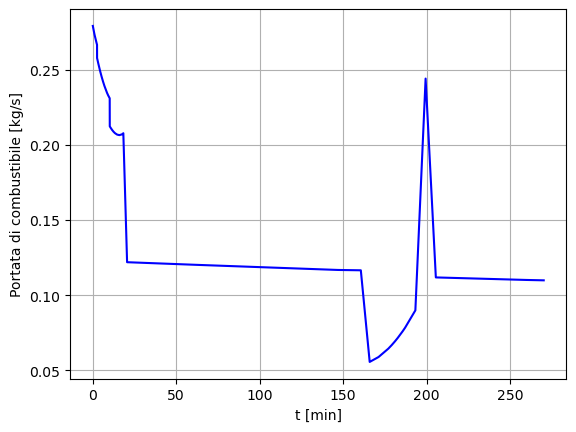

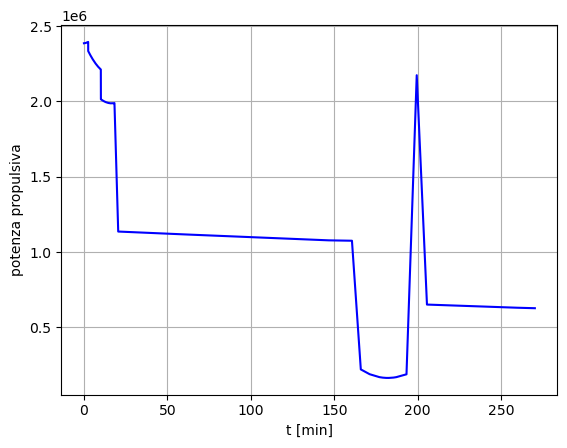

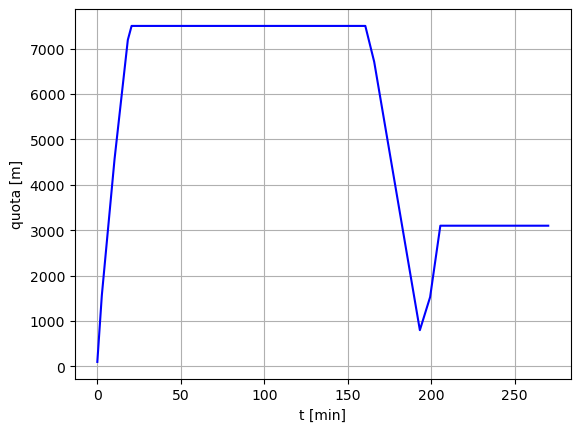

risultato dell integrale della portata nel tempo: 1973.9239867195722 kg
questo valore differisce dal nuovo Wf del 5.041511291376931%


In [10]:
newmission = pg.Mission.Mission(myaircraft)
myaircraft.mission = newmission
myaircraft.MissionStages['Climb3']['input']['EndAltitude'] = 7500
myaircraft.MissionStages['Cruise']['input']['Altitude'] = 7500
myaircraft.MissionStages['Descent1']['input']['StartAltitude'] = 7500
myaircraft.MissionStages['Cruise']['input']['Mach'] = 0.4
myaircraft.mission.InitializeProfile()
myaircraft.mission.SetInput()


wfuel = brenth(funcNL, 0, maxFuelCapacity, args=(WPayload), xtol=0.01)
myaircraft.weight.Wf = wfuel

print('Nuovo valore di Wf: ', myaircraft.weight.Wf)

WTO = OEW + WPayload+ myaircraft.weight.Wf

myaircraft.weight.Wf = myaircraft.mission.EvaluateMission(WTO)/myaircraft.weight.ef

print(myaircraft.mission.portata)

print('risultato di EvaluateMission: ', myaircraft.weight.Wf)

# myaircraft.mission.profile.DefineMission()
# myaircraft.mission.profile.MergeMission()

times = np.array([])
beta = np.array([])
for array in mission.integral_solution:
    times = np.concatenate([times, array.t])
    beta = np.concatenate([beta, array.y[1]])
    
dEdt = np.zeros(len(times))
PP = np.zeros(len(times))
for t in range(len(times)):
    PP[t] = (myaircraft.weight.WTO) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS')
    PRatio = myaircraft.powertrain.Traditional(myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.profile.Velocity(times[t]),PP[t])
    dEdt[t] = PP[t] * PRatio[0]
portata = dEdt/myaircraft.weight.ef

plt.figure(1)
plt.plot(times/60,portata, 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Portata di combustibile [kg/s]')
plt.show()

plt.figure(2)
plt.plot(times/60,PP, 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('potenza propulsiva')
plt.show()

alt = np.zeros(len(times))
for t in range(len(times)):
    alt[t] = myaircraft.mission.profile.Altitude(times[t])

plt.figure(3)
plt.plot(times/60,alt, 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('quota [m]')
plt.show()

# l'integrale della portata nel tempo deve coincidere con myaircraft.weight.Wf
from scipy.integrate import cumtrapz
massa_di_fuel = cumtrapz(portata, times, initial=0.0)
# l'elemento n-esimo del vettore massa_di_fuel è l'integrale definito della portata tra t = 0 e t = times[n]
print(f'risultato dell integrale della portata nel tempo: {massa_di_fuel[-1]} kg')
err = 100*abs(myaircraft.weight.Wf - massa_di_fuel[-1])/myaircraft.weight.Wf
print(f'questo valore differisce dal nuovo Wf del {err}%')

In [14]:
print(times/60)

[0.00000000e+00 1.24506776e-10 2.49013552e-10 1.49408131e-09
 2.73914908e-09 1.51898267e-08 2.76405043e-08 1.52147280e-07
 2.76654057e-07 1.52172182e-06 2.76678958e-06 1.52174672e-05
 2.76681448e-05 1.52174921e-04 2.76681697e-04 1.11707753e-03
 1.95747336e-03 2.79786920e-03 1.02922893e-02 1.77867095e-02
 2.52811296e-02 1.00225331e-01 1.75169533e-01 2.50113734e-01
 4.59873442e-01 6.69633149e-01 8.79392857e-01 1.08915257e+00
 1.90654527e+00 2.12684094e+00 2.34713662e+00 2.43586002e+00
 2.52458342e+00 2.53333333e+00 2.53333333e+00 2.53341275e+00
 2.53349217e+00 2.53428635e+00 2.53508053e+00 2.54302231e+00
 2.55096410e+00 2.62518303e+00 2.69940196e+00 2.77362089e+00
 3.32079094e+00 3.86796099e+00 4.41513104e+00 5.26961646e+00
 6.12410188e+00 6.97858730e+00 7.83307272e+00 8.49884299e+00
 9.16461326e+00 9.83038352e+00 9.97081383e+00 1.01112441e+01
 1.01166667e+01 1.01166667e+01 1.01168342e+01 1.01170017e+01
 1.01186766e+01 1.01203515e+01 1.01371009e+01 1.01538502e+01
 1.03213438e+01 1.048883

ValueError: x and y must have same first dimension, but have shapes (179,) and (446,)

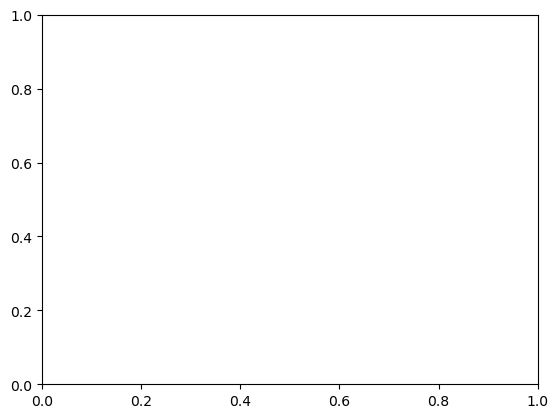

In [12]:
times = np.array([])
beta = np.array([])
for array in mission.integral_solution:
    times = np.concatenate([times, array.t])
    beta = np.concatenate([beta, array.y[1]])

plt.plot(times, myaircraft.mission.portata)